## 1. Set Data For Training

- Dataset: Cancer
- Sample : 50/class
- Feature : 4
- Randomseed: 42
- Scale : [-π, π]
- Take 64 sample for training: 32(class 1) and 32(class 1)
- Covert y = {1, 2} to y = {-1, 1} (1 -> -1, 2 -> 1)

In [30]:
from sklearn import datasets
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

# Load the iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Shuffle the dataset
np.random.seed(42)
shuffled_indices = np.random.permutation(X.shape[0])
X = X[shuffled_indices]
y = y[shuffled_indices]


# # Scale Minmaxscaler to [-π, π]
scaler = MinMaxScaler(feature_range=(-np.pi, np.pi))
X = scaler.fit_transform(X)


# Select 50 samples from each class (class 1, 2)
samples_per_class = 50
selected_indices = np.hstack([
    np.where(y == class_idx)[0][:samples_per_class] for class_idx in range(1, 3)
])

X_selected = X[selected_indices]
y_selected = y[selected_indices]


# Take 32 samples per class for training
train_samples_per_class = 32
train_indices = np.hstack([
    np.where(y_selected == class_idx)[0][:train_samples_per_class] for class_idx in range(1, 3)
])

X_train = X_selected[train_indices]
y_train = y_selected[train_indices]
y_train = np.where(y_train == 1, -1, 1)

print(f"Training X shape: {X_train.shape}")
print(f"Training y shape: {y_train.shape}")

# Get the indices of the remaining samples (not used for training)
remaining_indices = np.setdiff1d(np.arange(X_selected.shape[0]), train_indices)

X_test = X_selected[remaining_indices]
y_test = y_selected[remaining_indices]
y_test = np.where(y_test == 1, -1, 1)

print(f"Test X shape: {X_test.shape}")
print(f"Test y shape: {y_test.shape}")



Training X shape: (64, 4)
Training y shape: (64,)
Test X shape: (36, 4)
Test y shape: (36,)


In [31]:
# Save the training and testing data
np.savez_compressed("../data/iris_data.npz", X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

In [32]:
# Check file saved
data = np.load("../data/iris_data.npz")
print(data.files)
# compare arrays
assert np.array_equal(data['X_train'], X_train)
assert np.array_equal(data['y_train'], y_train)
assert np.array_equal(data['X_test'], X_test)
assert np.array_equal(data['y_test'], y_test)


['X_train', 'y_train', 'X_test', 'y_test']


## 2. Plot data

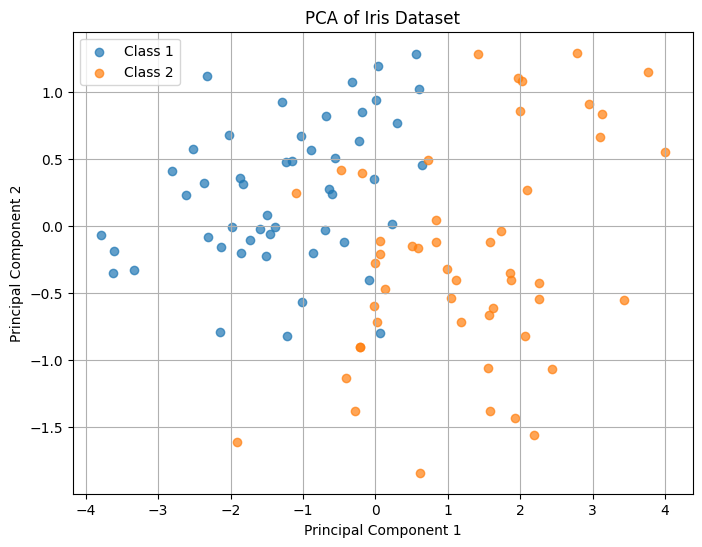

In [33]:
# PCA to 2 dimensions for visualization
pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X_selected)
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(X_2d[y_selected == 1, 0], X_2d[y_selected == 1, 1], label='Class 1', alpha=0.7)
plt.scatter(X_2d[y_selected == 2, 0], X_2d[y_selected == 2, 1], label='Class 2', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')
plt.legend()
plt.grid()
plt.show()

## 3. Kernel Matrix

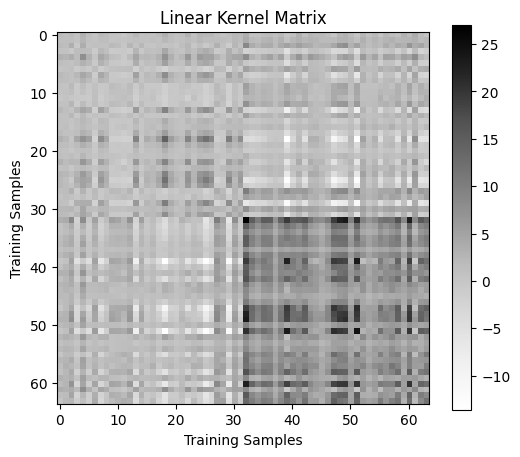

In [34]:
K_linear = X_train @ X_train.T

# Plot the kernel matrix
plt.figure(figsize=(6, 5))
plt.imshow(K_linear, cmap='Greys')
plt.colorbar()
plt.title('Linear Kernel Matrix')
plt.xlabel('Training Samples')
plt.ylabel('Training Samples')
plt.show()